# **Plotting and Visualization**

There are two main libraries dicussed in this notebook. Those are ***Matplotlib*** and ***Seaborn***.

## **Matplotlib**

First, let's import Matplotlib

In [1]:
import matplotlib.pyplot as plt

Import `Pandas` as `Numpy` as they are going to be used in the exploration of data later in this notebook

In [3]:
import pandas as pd
import numpy as np

### **Line Graph**

Let's start with a simple line graph. We will plot numbers and their square.

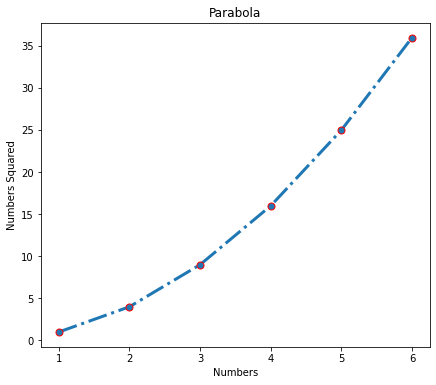

In [52]:
numbers = [1,2,3,4,5,6]
numbers_squared = [i*i for i in numbers]

fig_1 = plt.figure(figsize=(6,5))
ax_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #left, bottom, width, and height
ax_1.set_xlabel('Numbers')
ax_1.set_ylabel('Numbers Squared')
ax_1.set_title('Parabola')
ax_1.plot(numbers,numbers_squared,lw=3,ls="-.",marker='o',markersize=7,markeredgecolor='red')#the marker is the intersection of our data points

In [4]:
df_gas = pd.read_csv("https://raw.githubusercontent.com/raneemsultan/DataEngineering-CS1095/main/Lab2/gas_prices.csv",index_col=0)

In [5]:
df_gas.head(5)

,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
Year,,,,,,,,,,
1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


Since we gave gas prices for the same countries over different years, we can use a line graph to see the trend of gas prices over time in different countries. In the cell below, we chose Japan and Italy as an example. 

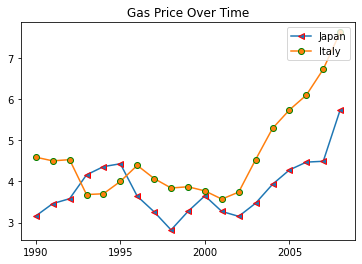

In [54]:
plt.plot(df_gas.index,df_gas['Japan'],label="Japan",marker='<',markeredgecolor='red')
plt.plot(df_gas.index,df_gas['Italy'],label="Italy",marker='o',markeredgecolor='green')
plt.title('Gas Price Over Time')#note here plt.title is used right away. However, when using the axes, we use plt.set_title()
plt.locator_params(integer=True)#to make the axis an integer
plt.legend(loc=1)

### **Scatter Plot**

Scatter plots are similar to line graphs in that they use horizontal and vertical axes to plot data points. However, they have a very specific purpose. Scatter plots show how much one variable is affected by another. 

For our example, we will be using the Titanic dataset. 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. We can use visualizations in order to observe the factors that were related to the survival of passengers.

In [7]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/raneemsultan/DataEngineering-CS1095/main/Lab2/titanic.csv",index_col=0)

In [8]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First, let's explore the relationship between the age and survival.

In [9]:
df_survivedTitanic = (df_titanic[(df_titanic['Age'].notnull()) & (df_titanic['Age']>=1) & (df_titanic['Survived']==1)])
df_survivedTitanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
age_counts = df_survivedTitanic.groupby(['Age'])['Survived'].sum() #returns a series of each age and the corresponding number of individuals who survived
print(age_counts)

Age
1.0      5
2.0      3
3.0      5
4.0      7
5.0      4
6.0      2
7.0      1
8.0      2
9.0      2
11.0     1
12.0     1
13.0     2
14.0     3
15.0     4
16.0     6
17.0     6
18.0     9
19.0     9
20.0     3
21.0     5
22.0    11
23.0     5
24.0    15
25.0     6
26.0     6
27.0    11
28.0     7
29.0     8
30.0    10
31.0     8
32.0     9
32.5     1
33.0     6
34.0     6
35.0    11
36.0    11
37.0     1
38.0     5
39.0     5
40.0     6
41.0     2
42.0     6
43.0     1
44.0     3
45.0     5
47.0     1
48.0     6
49.0     4
50.0     5
51.0     2
52.0     3
53.0     1
54.0     3
55.0     1
56.0     2
58.0     3
60.0     2
62.0     2
63.0     2
80.0     1
Name: Survived, dtype: int64


In [11]:
age_array = np.array(age_counts.index.values.tolist()) #convert the indicies to a numpy array
age_counts_array = np.array(age_counts.values.tolist())

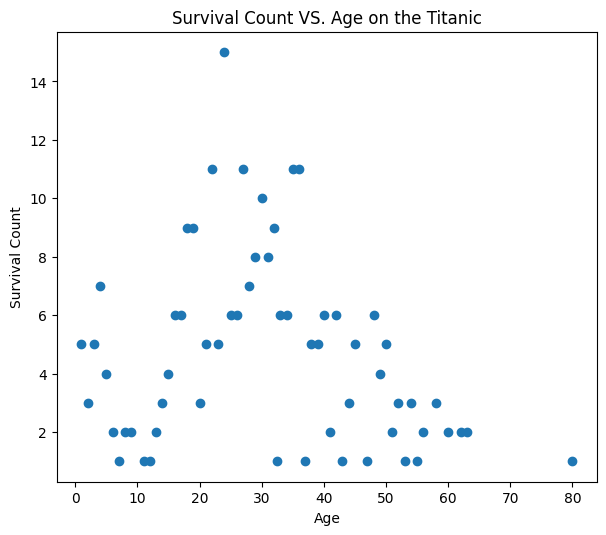

In [12]:
fig_1 = plt.figure(figsize=(6,5),dpi=100)
ax_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #left, bottom, width, and height
ax_1.set_xlabel('Age')
ax_1.set_ylabel('Survival Count')
ax_1.set_title('Survival Count VS. Age on the Titanic')
ax_1.scatter(age_array,age_counts_array)

What do you observe?



Another factor that can be considered is the gender. So let's explore it. But first, do you have any expectations for what we will find?

In [13]:
male_counts =  df_survivedTitanic[(df_survivedTitanic['Sex']=='male')].groupby(['Age'])['Survived'].sum()#returns a series of sum of male survivors 
female_counts =df_survivedTitanic[(df_survivedTitanic['Sex']=='female')].groupby(['Age'])['Survived'].sum()


males_indicies_array = np.array(male_counts.index.values.tolist())#convert the indicies to a list (The indicies are the unique ages)
males_values_array = np.array(male_counts.values.tolist()) #convert the values (count of people with a certain age) to a list

#convert both to a numpy array
females_indicies_array = np.array(female_counts.index.values.tolist())
females_values_array= np.array(female_counts.values.tolist())

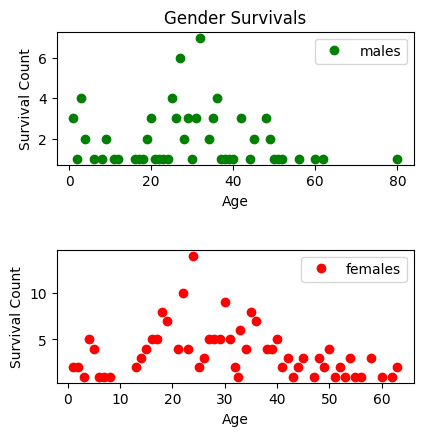

In [14]:
#create subplot that will hold two different graphs (axes)

fig, axs = plt.subplots(figsize=(5,5),nrows=2,ncols=1,dpi=100)
axs[0].set_title('Gender Survivals')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Survival Count')

axs[0].plot(males_indicies_array,males_values_array,'go',label="males")
axs[0].legend(loc=1)

axs[1].set_xlabel('Age')
axs[1].set_ylabel('Survival Count')
axs[1].plot(females_indicies_array,females_values_array ,'ro', label="females")
#loc upper right:1 - upper left:2 - lower left: 3 - lower right: 4
axs[1].legend(loc=1) #add a legend to 

plt.tight_layout(pad=3.0)

Let's combine both plots into one so we can compare them.

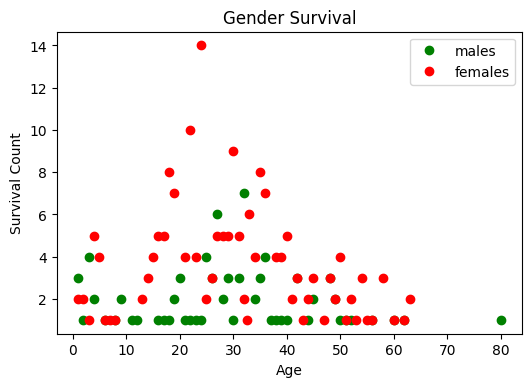

In [15]:
#create a subplot that will hold both genders in the same axes
fig_2,axs_2 = plt.subplots(1,1,dpi=100) #create a subplot with 1 row and 1 col (will hold 1 axes)
axs_2.set_xlabel('Age') #set the x label
axs_2.set_ylabel("Survival Count") #set the y label
axs_2.set_title('Gender Survival') #set the title of the graph
#axs_2.grid(True)#adds a grid to your plot
axs_2.plot(males_indicies_array,males_values_array,'go',label="males")#plot the males info using green circles (go)
axs_2.plot(females_indicies_array,females_values_array,'ro',label="females") #plot the females info using the red circles(ro)
axs_2.legend(loc=1)#locate the legend on the top right of the graph

 **Home Assignment**

As a quick exercise, plot a scattered plot with the *Age* on the x-axis and the *Survival* count on the y-axis, such that the size of the circle is equivalent to the mean *Fare* of the ticket for the passengers of a certain age. 

### **Histogram**

We can also use histograms to see how many people survived in each age group.

(array([31., 41., 77., 73., 34., 20.,  6.,  0.,  1.,  0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

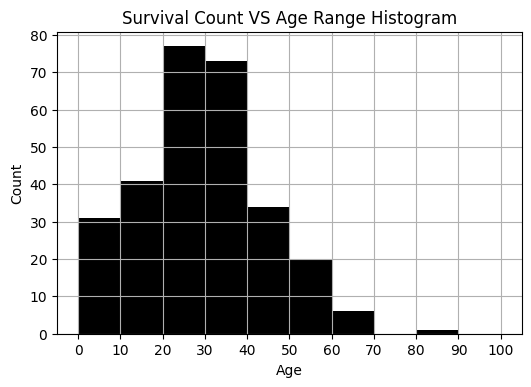

In [16]:
#plot a histogram of survival count vs age 
bins = [0,10,20,30,40,50,60,70,80,90,100]#the intervals (bins) of the histogram
fig, axs_3 = plt.subplots(1,1,dpi=100)
axs_3.set_title('Survival Count VS Age Range Histogram')
axs_3.set_xlabel('Age')
axs_3.set_xticks(bins)
#axs_3.set_xlim([35,90]) #zoom in, or show me a certain area on the graph 
axs_3.set_ylabel('Count')
axs_3.grid(True)
axs_3.hist(np.array(df_survivedTitanic['Age'].tolist()),width=10,bins=bins,color='black')#a numpy array that has the ages of each passenger who survived (all ages not only unique values)

What do you observe?

### **Bar Charts**

Bar charts are used whenever categorical analysis is to be applied. On the other hand, histograms are used whenever quantitative analysis is to be applied.

In the below cells, an attempt is made to visualize the survival rates for each `Pclass` in the ship.

First, the number of uniques Pclasses should be identified.

In [17]:
df_survivedTitanic.groupby(['Pclass'])['Survived'].sum() #There exists 3 unique class values 
#the below result is a series that contains 3 unique values

Pclass
1    121
2     80
3     82
Name: Survived, dtype: int64

Checking the above cell, it is observed that there exists 3 class, namely: 1, 2, and 3. Each of the class has the corresponding number of passengers that survived within it.

In [18]:
gender_class_Series = df_survivedTitanic.groupby(['Sex','Pclass'])['Survived'].sum() #returns a series
indices_gc = gender_class_Series.index.values.tolist()#convert the series to list of indicies
values_surv = gender_class_Series.values.tolist()# and values
print(values_surv)

[82, 68, 45, 39, 12, 37]


In [19]:
y_labels =  [f"{k[0]}-{k[1]}" for k in indices_gc]
temp_y_labels =np.arange(len(indices_gc))

([<matplotlib.axis.YTick at 0x7f225afc1828>,
 [Text(0, 0, 'female-1'),
  Text(0, 0, 'female-2'),
  Text(0, 0, 'female-3'),
  Text(0, 0, 'male-1'),
  Text(0, 0, 'male-2'),
  Text(0, 0, 'male-3')])

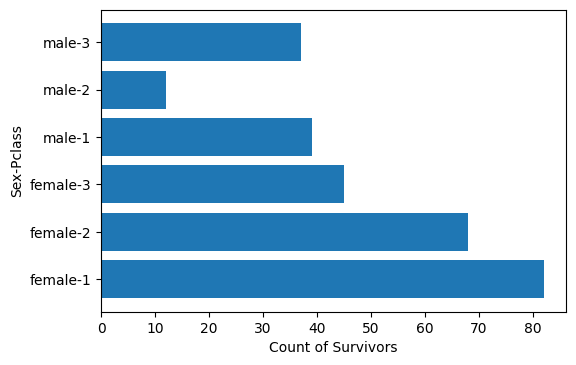

In [20]:
fig_3,axs_4 = plt.subplots(1,1,dpi=100)
axs_4.set_ylabel('Sex-Pclass')
axs_4.set_xlabel('Count of Survivors')
bar_chart = plt.barh(temp_y_labels,values_surv) #switch x and y when you create barh
plt.yticks(temp_y_labels,y_labels)

We can visualize the same data using another method.

In [21]:
male_class_Series = df_survivedTitanic[df_survivedTitanic['Sex']=='male'].groupby(['Pclass'])['Survived'].sum() #returns a series of males who survived grouped by class

In [22]:
maleClassIndicies = male_class_Series.index.values.tolist()

maleClassValues = male_class_Series.values.tolist()

In [23]:
female_class_Series = df_survivedTitanic[df_survivedTitanic['Sex']=='female'].groupby(['Pclass'])['Survived'].sum() #returns a series of females who survived grouped by class

In [24]:
print(female_class_Series)

femaleClassIndicies = female_class_Series.index.values.tolist()

femaleClassValues = female_class_Series.values.tolist()

Pclass
1    82
2    68
3    45
Name: Survived, dtype: int64


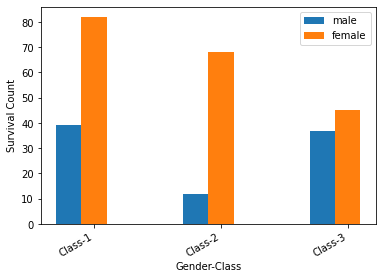

In [25]:
fig_4, axs_5 = plt.subplots(1,1)
axs_5.set_xlabel('Gender-Class')
axs_5.set_ylabel('Survival Count')
temp_x_female =np.arange(len(femaleClassIndicies))
axs_5.bar(np.arange(len(maleClassIndicies)),maleClassValues,width=0.2,label="male")#draw the male bar graph
axs_5.bar(temp_x_female+0.2,femaleClassValues,width=0.2,label="female")#draw the female bar graph 0.2 away from the male
plt.xticks(temp_x_female+0.2, [f"Class-{i}" for i in maleClassIndicies])#create the labels of the x axis (Class-1, Class-2, Class-3)
plt.setp(axs_5.get_xticklabels(),rotation=30,ha="right")#rotate the labels on the x axis by 30 degrees to the right
axs_5.legend(loc=1)

Or we can visualize it using the method below:

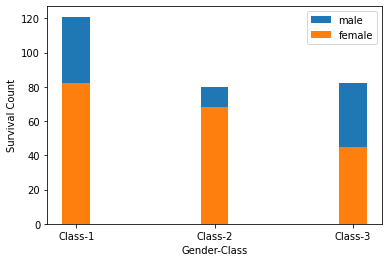

In [26]:
fig_4, axs_5 = plt.subplots(1,1)
axs_5.set_xlabel('Gender-Class')
axs_5.set_ylabel('Survival Count')
temp_x_female =np.arange(len(femaleClassIndicies))
axs_5.bar(np.arange(len(maleClassIndicies)),maleClassValues,width=0.2,label="male",bottom=femaleClassValues)
axs_5.bar(temp_x_female,femaleClassValues,width=0.2,label="female")
plt.xticks(temp_x_female, [f"Class-{i}" for i in maleClassIndicies])
axs_5.legend(loc=1)

### **Heat Map**

Heat Maps are used to represent 2D data using colorcodes. The below code, displays the percentage of failure, through colors, in each academic year (2015-2020) for each of the mentioned subjects. 

Below is a portion of an existing pool of color maps that the analyzer can use when plotting the Hash Map.

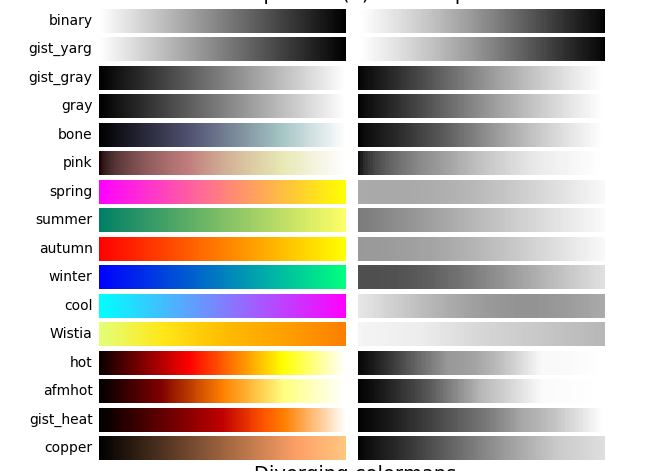

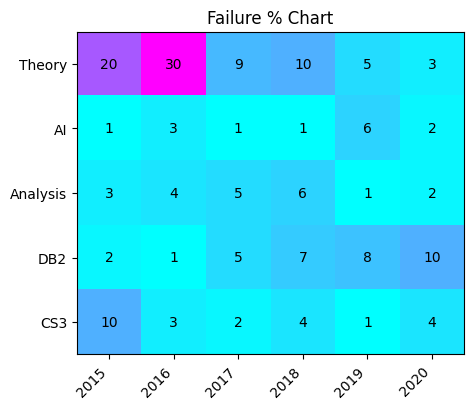

In [27]:
Subjects = ["Theory","AI","Analysis","DB2","CS3"] #a list holding the subjects' names
Academic_Year = ["2015","2016","2017","2018","2019","2020"]# a list of the academic years involved in the analysis
PercentageOfFailure= [[20,30,9,10,5,3],[1,3,1,1,6,2],[3,4,5,6,1,2],[2,1,5,7,8,10],[10,3,2,4,1,4]]#percentage of failure for each subject in each academic year

fig,ax10 = plt.subplots(figsize=(5,10),dpi=100)#create a subplot
heatMap = ax10.imshow(PercentageOfFailure, cmap='cool')#use unshow to plot the data for the percentage failure
ax10.set_xticks(np.arange(len(Academic_Year)))
ax10.set_yticks(np.arange(len(Subjects)))
ax10.set_xticklabels(Academic_Year)#the academic years are on the x-axis
ax10.set_yticklabels(Subjects)#the subject names are on the y-axis
ax10.set_title("Failure % Chart")
plt.setp(ax10.get_xticklabels(),rotation=45,ha="right")

for i in range(len(Subjects)):
    for j in range(len(Academic_Year)):
        text = ax10.text(j,i,PercentageOfFailure[i][j],ha="center",va="center")#here j is x and i is y

---

## **Seaborn**

Seaborn makes our charts and plots look engaging and enables some of the common data visualization needs (like mapping color to a variable or using faceting). Basically, it makes the data visualization and exploration easy to conquer. And trust me, that is no easy task in data science.

There are essentially a couple of (big) limitations in matplotlib that Seaborn fixes:

-   Seaborn comes with a large number of high-level interfaces and customized themes that matplotlib lacks as it’s not easy to figure out the settings that make plots attractive

-    Matplotlib functions don’t work well with dataframes, whereas seaborn does

First, let's import Seaborn

In [28]:
import seaborn as sns 

### **Line Graph**

Line graphs are usually used to analyze relationships between two variables. For example, it can be used to specify trends (variable 1) over time (variable 2)

In [29]:
spotify_data =pd.read_csv('https://raw.githubusercontent.com/raneemsultan/DataEngineering-CS1095/main/Lab2/spotify.csv',parse_dates=True,index_col=0)
spotify_data.tail()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0
2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0
2018-01-09,4168506,2791601.0,2058016.0,2727678.0,2627334.0


The above imported datasets belongs to Spotify.

Text(0, 0.5, 'Number of times played')

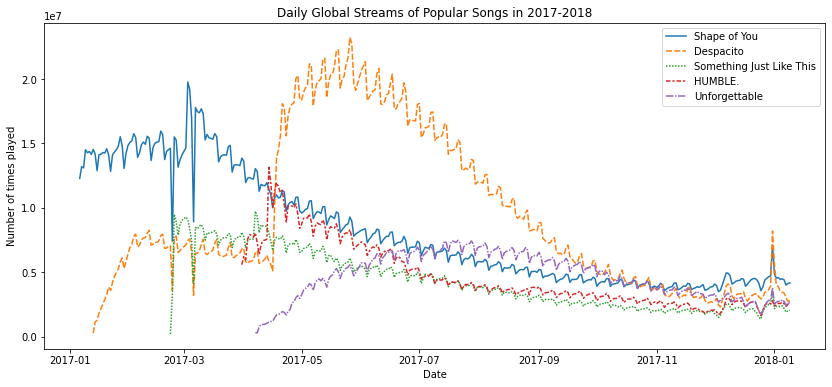

In [30]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of each song 
sns.lineplot(data=spotify_data)
plt.ylabel('Number of times played')

Text(0.5, 0, 'Date')

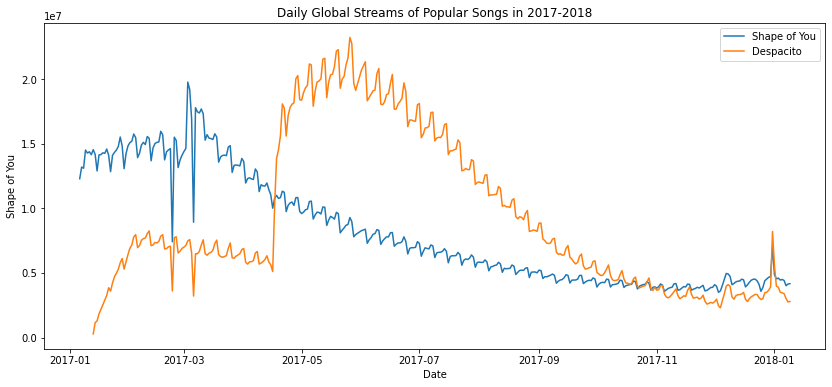

In [31]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=spotify_data['Despacito'], label="Despacito")

# Add label for horizontal axis
plt.xlabel("Date")

The above graphs show the trend of certain songs over time.

### **Line Graph Exercise**

You can find the csv file that contains the museum visitors data here: https://https://raw.githubusercontent.com/raneemsultan/DataEngineering-CS1095/main/Lab2/museum_visitors.csv


 First, we will read the csv file into a dataframe.

In [ ]:
museum_data = pd.read_csv("https://raw.githubusercontent.com/raneemsultan/DataEngineering-CS1095/main/Lab2/museum_visitors.csv", index_col="Date", parse_dates=True)

Second, review the data by taking a look at a few of the rows.

In [ ]:
# Your solution here


 Third, convince the museum board 

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

To show the museum board how the event compared to regular traffic at each museum, create a line chart that shows how the number of visitors to each museum evolved over time.  Your figure should have four lines (one for each museum).


In [ ]:
#Your solution here


### **Scatter Plots**

Let's the read the data

In [32]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/raneemsultan/DataEngineering-CS1095/main/Lab2/insurance.csv")

In [33]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


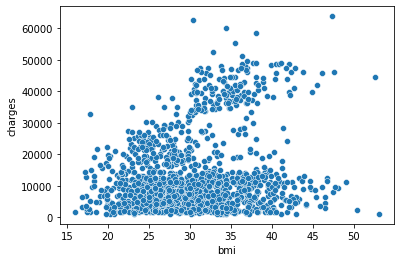

In [34]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

The scatterplot above suggests that body mass index (BMI) and insurance charges are **positively correlated**, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to `sns.regplot`.

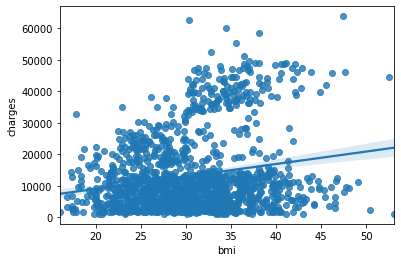

In [35]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.

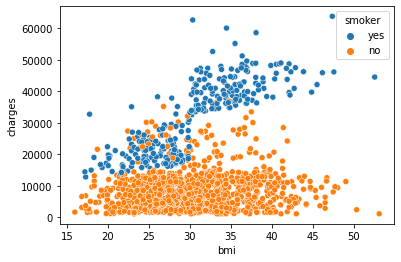

In [36]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.

### **Scatter Plot Exercise**

First, read the data into a dataframe. The csv file can be found here: https://raw.githubusercontent.com/raneemsultan/DataEngineering-CS1095/main/Lab2/candy.csv

In [ ]:
#Your solution here


Second, review the data.

In [ ]:
#Your solution here


Third, explore the role of sugar. Do people tend to prefer candies with higher sugar content?

In [ ]:
#Your solution here


Does the scatter plot show a **strong** correlation between the two variables?  If so, are candies with more sugar relatively more or less popular with the survey respondents?

### **Bar Charts**

[Text(0, 0.5, 'Bill'), Text(0.5, 0, 'Gender')]

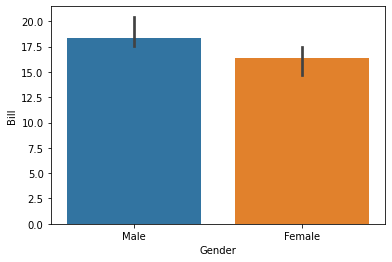

In [37]:
#let's create a bar chart based on the mean/median/std/var/cov (covariance) that each gender pays
# the default estimator is the mean not the median 
df_tips =sns.load_dataset("tips")
bp = sns.barplot(x= 'sex', y='total_bill',data=df_tips,estimator=np.median)
bp.set(xlabel="Gender",ylabel="Bill")#renaming the x and y axes

[Text(0, 0.5, 'Tip'), Text(0.5, 0, 'Gender')]

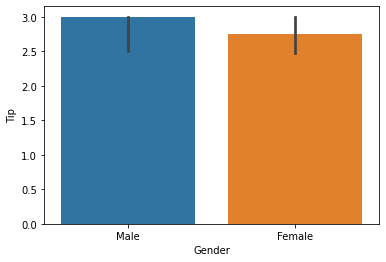

In [38]:
bp_tips = sns.barplot(x='sex', y='tip', data=df_tips, estimator=np.median)
bp_tips.set(xlabel="Gender",ylabel="Tip")

In [39]:
# Read the file into a variable flight_data
flight_data = pd.read_csv("https://raw.githubusercontent.com/raneemsultan/DataEngineering-CS1095/main/Lab2/flight_delays.csv",index_col=0)

In [40]:
flight_data.head()

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


Text(0.5, 1.0, 'Average Arrival Delay for Spirit Airlines Flights, by Month')

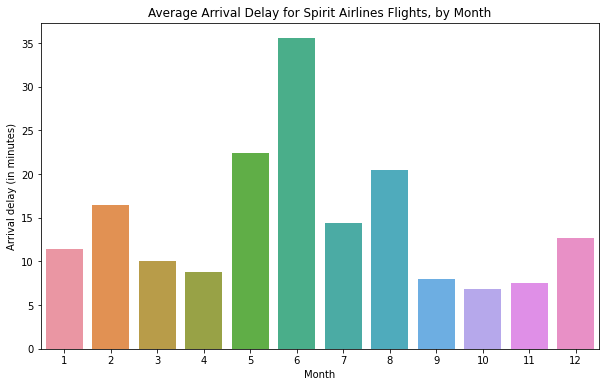

In [50]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Bar chart showing average arrival delay for Spirit Airlines flights by month
bp_flights = sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
bp_flights.set_ylabel("Arrival delay (in minutes)")

# Add title
bp_flights.set_title("Average Arrival Delay for Spirit Airlines Flights, by Month")

What's wrong with the above graph?


### **Bar Chart Exercise**
*Using the FIFA dataset, create a bar chart which visualizes the average overall rating of the players based on their nationalities. Make sure that the x tick labels are visible. Give the plot a title, labels on both axes, and display only the top 10 nationality overall ratings.*


The FIFA dataset has the attributes for each player in the football industry. This includes the following:

**ID**: The ID of the player

**Name**: The name of the player

**Age**: The age of the player

**Photo**: the photot URL of each player

**Nationality**: The nationality of the player

**Flag**: The URL of the player's country flag

**Overall**: The overall player's rating

**Club**: The club to which the player belongs

etc.. 



In [ ]:
#Read the CSV

#Observe the rows


In [ ]:
#Your solution here


### **Bar Chart Advanced Exercise**
*Using the FIFA dataset, create a bar chart which visualizes the average overall rating of the players based on their nationalities **(Only if there are more than 30 players from that nationality)**. Make sure that the x tick labels are visible. Give the plot a title, labels on both axes, and display only the top 10 nationality overall ratings.*

**HINT**: Google the `transform` function to know how to get the nationalities that are displayed more than 30 times only.

In [ ]:
#Your solution here




### **Heat Map**

We can use the flights dataset we imported above to create a heatmap that will show us information about the average delay for each airline by month.

Text(0.5, 42.0, 'Airline')

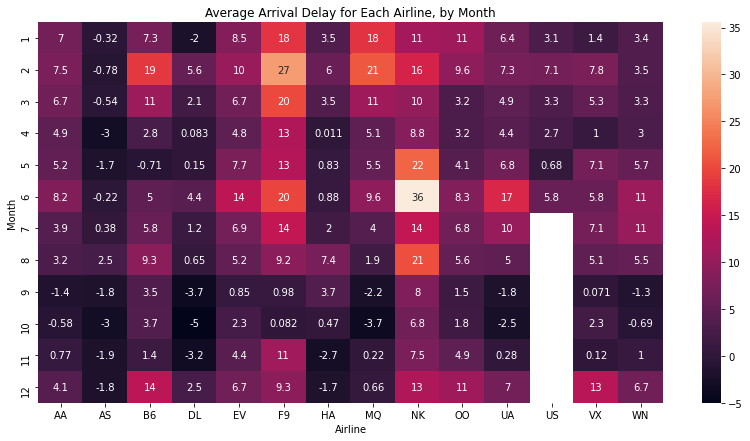

In [42]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

### **Heat Map Exercise** 

*Create a HeatMap for the gas prices change from 2000 till 2008 for the countries in the `gas_prices` dataset. Observe the country with the highest gas price, and how does this country's price differ thorughout the years compared to the other countries.*

In [ ]:
#Your solution here



### **Distribution Plots**

Distribution plots, display the distribution for one variable.

The below dataset describes the driver's status, when the car crashed in a certain state in the United States. Our role is trying to identify several factors:

1. How likely it is that the driver was not distracted when the car crashed?
2. What is the correlation between the driver not being distracted and speeding when the car crashed?
3. What is the relation between the car crashing and every two factors in the dataset?

In [43]:
df_car_crashes = sns.load_dataset("car_crashes")#seaborn has built in functions to retrieve datasets

In [44]:
df_car_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


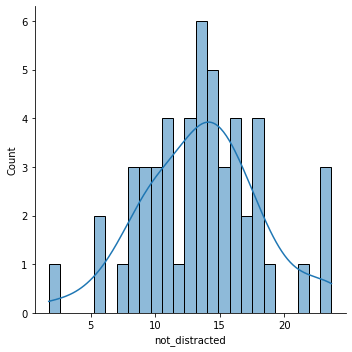

In [45]:
sns.displot(df_car_crashes['not_distracted'],bins=25,kde=True)

#plots the kernel density estimate 
#univarient distribution: provides distribution for one variable 

### **Join Plots**

Join plots show the correlation between two variables. In the below chart, they show the correlation of the accident taking place such that the person was both speeding and not distracted.

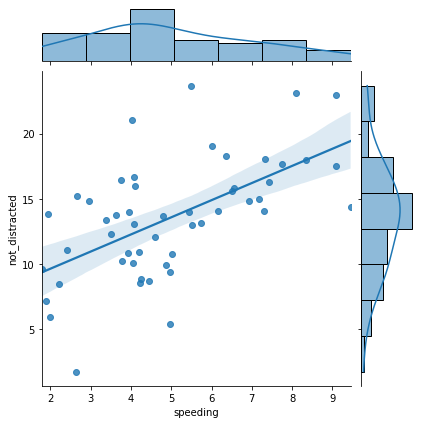

In [46]:
sns.jointplot(x='speeding',y='not_distracted',data=df_car_crashes,kind='reg')#draws a regression line representing the 2 variables we are trying to identify

---

Alternatively a hexagon-shaped plot can be used to show the correlation.

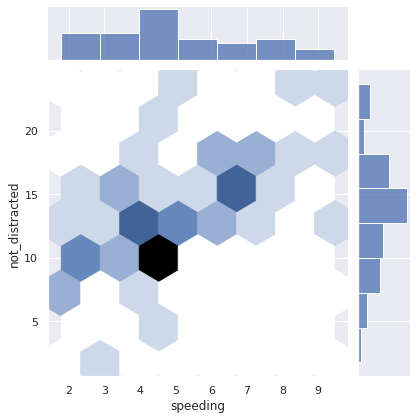

In [ ]:
sns.jointplot(x='speeding',y='not_distracted',data=df_car_crashes,kind='hex')

### **Pair Plots** 

The pair plots show the relationship between every variable and every other variable.

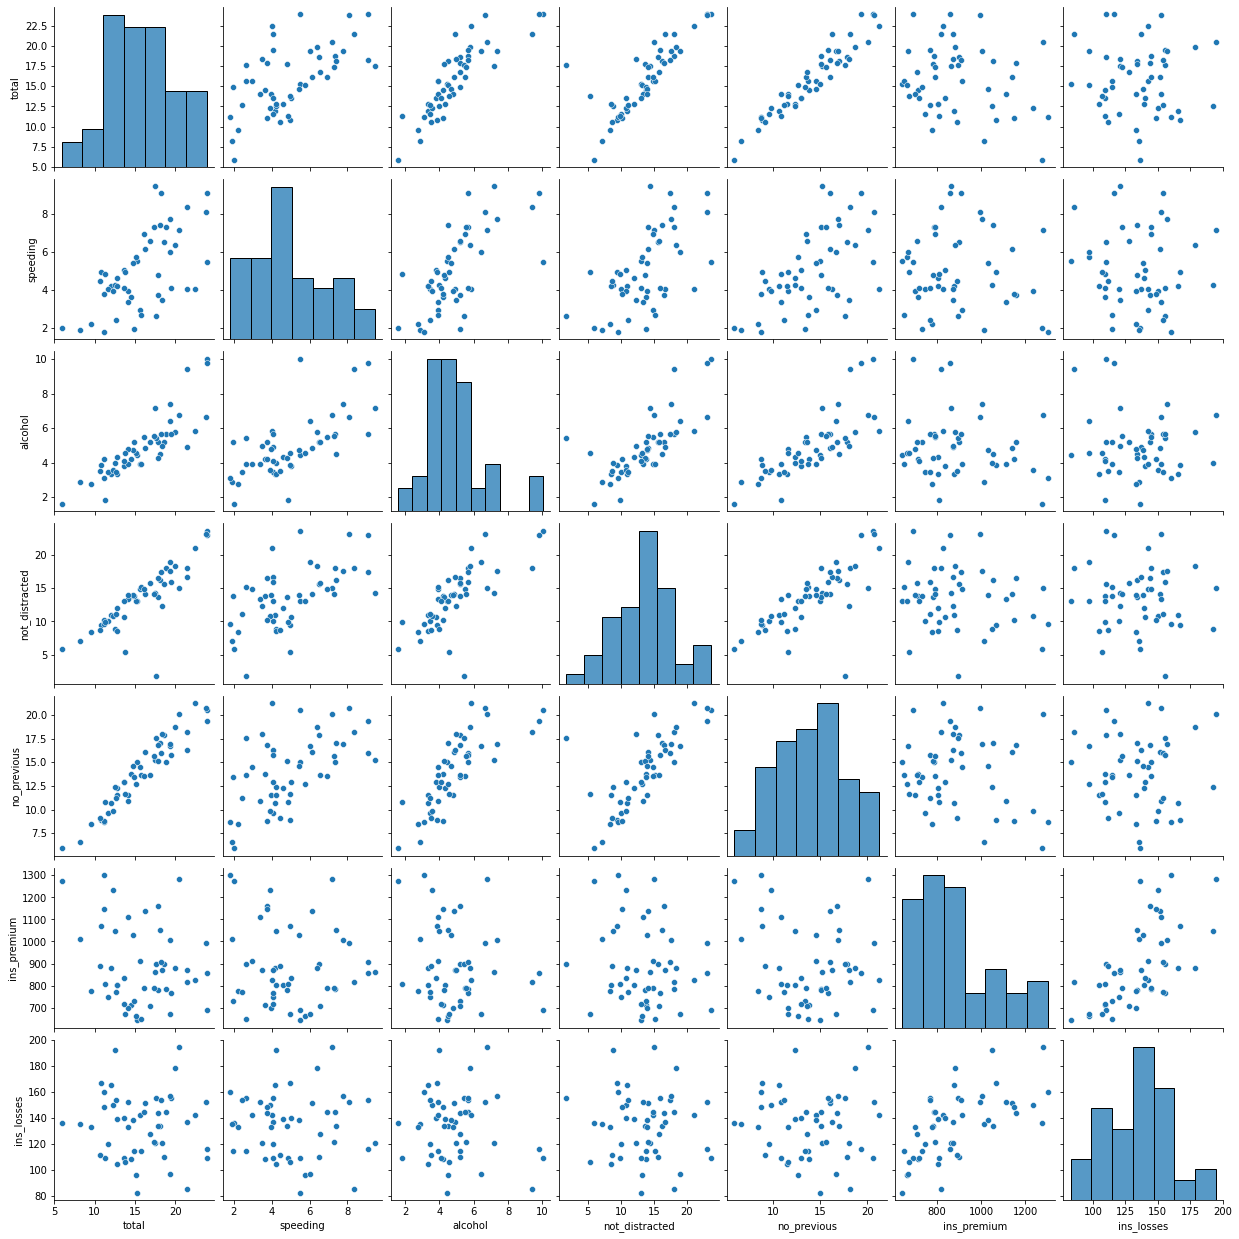

In [47]:
sns.pairplot(df_car_crashes) 

### Home Assignmnet Solution

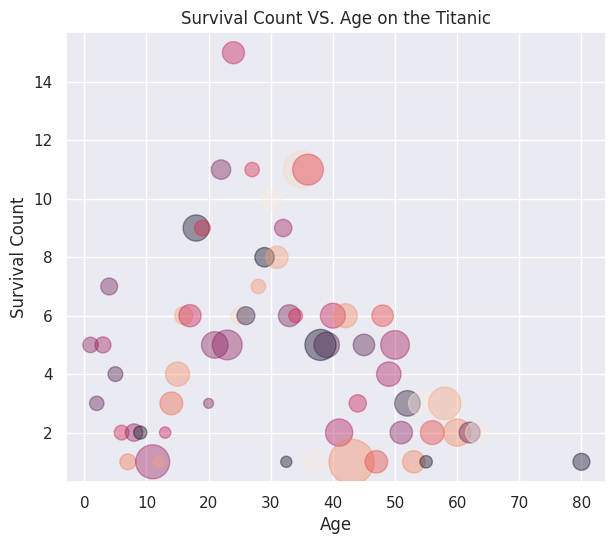

In [ ]:
fig_1 = plt.figure(figsize=(6,5),dpi=100)
ax_1 = fig_1.add_axes([0.1,0.1,0.9,0.9]) #left, bottom, width, and height
ax_1.set_xlabel('Age')
ax_1.set_ylabel('Survival Count')
ax_1.set_title('Survival Count VS. Age on the Titanic')


# all the above are identical to what you have observed earlier in the notebook: A simple scattered plot that represents Count of Survivors VS. Age.
# What needs to be done now is changing size and color depending on the average fare paid by passengers of a certain age
fare_mean_per_age = np.array(df_survivedTitanic.groupby(['Age'])['Fare'].mean().values.tolist())#get the mean fare for every age and add it to an array
color_arr = np.random.rand(len(fare_mean_per_age)) #generate random N colors, where N is the number of ages on the trip
ax_1.scatter(age_array,age_counts_array,s=fare_mean_per_age*5,c=color_arr,alpha=0.4)

## **References**

**Kaggle Sources**

https://www.kaggle.com/saduman/eda-and-data-visualization-with-seaborn

https://www.kaggle.com/alexisbcook/hello-seaborn

**YouTube Sources**

 https://www.youtube.com/watch?v=6GUZXDef2U0&t=310s
 
 https://youtu.be/3Xc3CA655Y4?t=35

